<a href="https://colab.research.google.com/github/Abinaya-J/Udacity_Intro_to_Data_Analysis/blob/master/L1_Starter_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data from CSVs

In [2]:
import csv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()
enrollments=[]
with open('enrollments.csv', 'rb') as f:
    reader = csv.DictReader(f)
    enrollments = list(reader)

In [39]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = []     
with open('daily_engagement.csv', 'rb') as f:
    reader = csv.DictReader(f)
    daily_engagement = list(reader)
    
project_submissions = []
with open('project_submissions.csv', 'rb') as f:
    reader = csv.DictReader(f)
    project_submissions = list(reader)
    
print(daily_engagement[0])
print(project_submissions[0])
print(enrollments[0])

{'lessons_completed': '0.0', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'projects_completed': '0.0', 'acct': '0', 'utc_date': '2015-01-09'}
{'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'account_key': '256', 'assigned_rating': 'UNGRADED', 'completion_date': '2015-01-16', 'creation_date': '2015-01-14'}
{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 10, 0, 0), 'account_key': '448', 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), 'days_to_cancel': 65}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
print(enrollments[0])

{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 10, 0, 0), 'account_key': '448', 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), 'days_to_cancel': 65}


In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
print(daily_engagement[0])

{'lessons_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'projects_completed': 0, 'acct': '0', 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print(project_submissions[0])

{'lesson_key': '3176718735', 'processing_state': 'EVALUATED', 'account_key': '256', 'assigned_rating': 'UNGRADED', 'completion_date': datetime.datetime(2015, 1, 16, 0, 0), 'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


## Investigating the Data

In [7]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)

unique_enrolled_students= set()
for enrollment in enrollments:
    unique_enrolled_students.add(enrollment['account_key'])
enrollment_num_unique_students = len(unique_enrolled_students)
print(enrollment_num_unique_students)


engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)

unique_engaged_students= set()
for engagement in daily_engagement:
    unique_engaged_students.add(engagement['acct'])
engagement_num_unique_students = len(unique_engaged_students)
print(engagement_num_unique_students)


submission_num_rows =len(project_submissions)
print(submission_num_rows)

unique_submitted_students= set()
for submission in project_submissions:
    unique_submitted_students.add(submission['account_key'])
submission_num_unique_students = len(unique_submitted_students)
print(submission_num_unique_students)


1640
1302
136240
1237
3642
743


## Problems in the Data

In [8]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engaged_students:
        print enrollment
        break

{'status': 'canceled', 'is_udacity': False, 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'account_key': '1219', 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0}


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engaged_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

print(num_problem_students)

{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59}
{'status': 'canceled', 'is_udacity': True, 'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'account_key': '1304', 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99}
{'status': 'current', 'is_udacity': True, 'is_canceled': False, 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'account_key': '1101', 'cancel_date': None, 'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
print(len(udacity_test_accounts))

6


In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
  if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
    account_key = enrollment['account_key']
    enrollment_date = enrollment['join_date']
    if account_key not in paid_students or \
    enrollment_date > paid_students[account_key]:
      paid_students[account_key] = enrollment_date
print(len(paid_students))

995


## Getting Data from First Week

In [31]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [32]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
def remove_free_trial_cancels(data):
  new_data = []
  for data_point in data:
    if data_point['account_key'] in paid_students:
      new_data.append(data_point)
  return new_data

paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
print(len(paid_engagement))

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
  account_key = engagement_record['account_key']
  join_date = paid_students[account_key]
  engagement_record_date = engagement_record['utc_date']
  if within_one_week(join_date, engagement_record_date):
    paid_engagement_in_first_week.append(engagement_record)

print(len(paid_engagement_in_first_week))

134549
6919


## Exploring Student Engagement

In [33]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [34]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [35]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [36]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
  if total_minutes > max_minutes:
    max_minutes = total_minutes
    student_with_max_minutes = student

print(max_minutes)

for engagement_record in paid_engagement_in_first_week:
  if engagement_record['account_key'] == student_with_max_minutes:
    print engagement_record

3564.7332645
{'lessons_completed': 4, 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'lessons_completed': 6, 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'lessons_completed': 6, 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'lessons_completed': 2, 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{'lessons_completed': 1, 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'projects_completed': 0, 'account_key': '163', 'utc_date': datetime.datetime(2015, 7, 13, 0, 0)}
{'lessons_completed': 1, 'num_courses_visited': 2, 't

## Lessons Completed in First Week

In [37]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_completed_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_lessons_completed = 0
    for engagement_record in engagement_for_student:
        total_lessons_completed += engagement_record['lessons_completed']
    total_lessons_completed_by_account[account_key] = total_lessons_completed

import numpy as np

total_lessons_completed = total_lessons_completed_by_account.values()
print 'Mean:', np.mean(total_lessons_completed)
print 'Standard deviation:', np.std(total_lessons_completed)
print 'Minimum:', np.min(total_lessons_completed)
print 'Maximum:', np.max(total_lessons_completed)

Mean: 1.636180904522613
Standard deviation: 3.0025612998294227
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [41]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

for engagement_record in paid_engagement:
  if engagement_record['num_courses_visited'] > 0:
    engagement_record['has_visited'] = 1
  else:
    engagement_record['has_visited'] = 0

total_days_visited_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_days_visited = 0
    for engagement_record in engagement_for_student:
        total_days_visited += engagement_record['has_visited']
    total_days_visited_by_account[account_key] = total_days_visited

import numpy as np

total_days_visited = total_days_visited_by_account.values()
print 'Mean:', np.mean(total_days_visited)
print 'Standard deviation:', np.std(total_days_visited)
print 'Minimum:', np.min(total_days_visited)
print 'Maximum:', np.max(total_days_visited)

Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [45]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

for submission in paid_submissions:
  project = submission['lesson_key']
  rating = submission['assigned_rating']    

  if ((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
    pass_subway_project.add(submission['account_key'])

passing_engagement = []
non_passing_engagement =[]

for engagement_record in paid_engagement_in_first_week:
  if engagement_record['account_key'] in pass_subway_project:
    passing_engagement.append(engagement_record)
  else:
    non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


## Comparing the Two Student Groups

In [62]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
import numpy as np
def describe_data(data):
  print 'Mean:', np.mean(data)
  print 'Standard deviation:', np.std(data)
  print 'Minimum:', np.min(data)
  print 'Maximum:', np.max(data)
    
pass_subway_project_by_account = defaultdict(list)
for engagement_record in passing_engagement:
  account_key = engagement_record['account_key']
  pass_subway_project_by_account[account_key].append(engagement_record)

non_pass_subway_project_by_account = defaultdict(list)
for engagement_record in non_passing_engagement:
    account_key = engagement_record['account_key']
    non_pass_subway_project_by_account[account_key].append(engagement_record)

total_minutes_pass_subway_project_by_account = {}
for account_key, engagement_for_student in pass_subway_project_by_account.items():
    pass_total_minutes = 0
    for engagement_record in engagement_for_student :
        pass_total_minutes += engagement_record['total_minutes_visited']
    total_minutes_pass_subway_project_by_account[account_key] = pass_total_minutes

pass_total_minutes = total_minutes_pass_subway_project_by_account.values()
print describe_data(pass_total_minutes)

total_minutes_non_pass_subway_project_by_account = {}
for account_key, engagement_for_student in non_pass_subway_project_by_account.items():
    non_pass_total_minutes = 0
    for engagement_record in engagement_for_student :
        non_pass_total_minutes += engagement_record['total_minutes_visited']
    total_minutes_non_pass_subway_project_by_account[account_key] = non_pass_total_minutes

non_pass_total_minutes = total_minutes_non_pass_subway_project_by_account.values()
print describe_data(non_pass_total_minutes)


Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
None
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
None


In [71]:
total_lessons_completed_by_pass_account = {}
for account_key, engagement_for_student in pass_subway_project_by_account.items():
  pass_total_lessons_completed = 0
  for engagement_record in engagement_for_student:
    pass_total_lessons_completed += engagement_record['lessons_completed']
    total_lessons_completed_by_pass_account[account_key] = pass_total_lessons_completed

pass_total_lessons_completed = total_lessons_completed_by_pass_account.values()
print describe_data(pass_total_lessons_completed)

total_lessons_completed_by_non_pass_account = {}
for account_key, engagement_for_student in non_pass_subway_project_by_account.items():
  non_pass_total_lessons_completed = 0
  for engagement_record in engagement_for_student:
    non_pass_total_lessons_completed += engagement_record['lessons_completed']
    total_lessons_completed_by_non_pass_account[account_key] = non_pass_total_lessons_completed

non_pass_total_lessons_completed = total_lessons_completed_by_non_pass_account.values()
print describe_data(non_pass_total_lessons_completed)


Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
None
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
None


In [69]:
total_visits_by_pass_account = {}
for account_key, engagement_for_student in pass_subway_project_by_account.items():
  pass_total_visits = 0
  for engagement_record in engagement_for_student:
    pass_total_visits += engagement_record['has_visited']
    total_visits_by_pass_account[account_key] = pass_total_visits

pass_total_visits = total_visits_by_pass_account.values()
print describe_data(pass_total_visits)

total_visits_by_non_pass_account = {}
for account_key, engagement_for_student in non_pass_subway_project_by_account.items():
  non_pass_total_visits = 0
  for engagement_record in engagement_for_student:
    non_pass_total_visits += engagement_record['has_visited']
    total_visits_by_non_pass_account[account_key] = non_pass_total_visits

non_pass_total_visits = total_visits_by_non_pass_account.values()
print describe_data(non_pass_total_visits)

Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
None
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619049
Minimum: 0
Maximum: 7
None


## Making Histograms

Populating the interactive namespace from numpy and matplotlib


(array([97., 90., 56.,  0., 41., 15.,  0., 24., 17.,  8.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

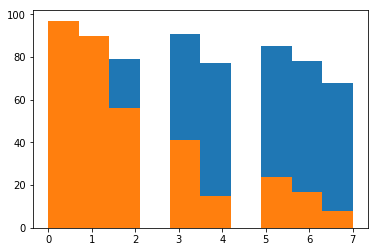

In [76]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
%pylab inline
import matplotlib.pyplot as plt
#plt.hist(pass_total_minutes)
#plt.hist(non_pass_total_minutes)

#plt.hist(pass_total_lessons_completed)
#plt.hist(non_pass_total_lessons_completed)

plt.hist(pass_total_visits)
plt.hist(non_pass_total_visits)

## Improving Plots and Sharing Findings

Text(0.5,1,'Distribution of classroom visits in the first week for students who pass the subway project')

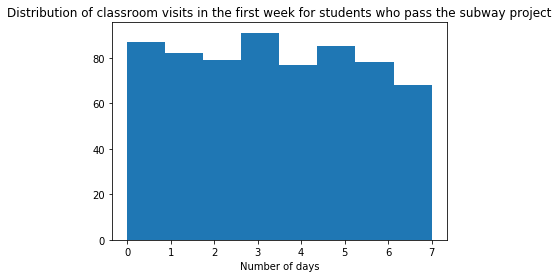

In [77]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns
plt.hist(pass_total_visits, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')
